# EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from utils.dataset import Dataset
from utils import eda

## Dataset

In [4]:
path = 'dataset'

In [5]:
data = pd.read_excel(f'{path}/01_data.xlsx')

In [6]:
train_set = data.dropna()
train_set['Time'] = pd.to_datetime(train_set['Time'])
train_X = train_set.drop(['Y1', 'Y2'], axis=1)
train_y1 = train_set['Y1']
train_y2 = train_set['Y2']

In [7]:
test_set = data[data['Y1'].isnull()].reset_index(drop=True)
test_set['Time'] = pd.to_datetime(test_set['Time'])
test_X = test_set.dropna(axis=1)

In [8]:
train_X = Dataset(df=train_X)

<class 'pandas.core.frame.DataFrame'>
Size: 4.43 MiB
Number of Features: 28
 |_datetime64[ns] => 1
 |_float64 => 27


In [9]:
test_X = Dataset(df=test_X)

<class 'pandas.core.frame.DataFrame'>
Size: 1.50 MiB
Number of Features: 28
 |_datetime64[ns] => 1
 |_float64 => 27


## EDA

### Check NaN

In [10]:
train_X.check_nans()

Series([], dtype: int64)


Series([], dtype: int64)

In [11]:
test_X.check_nans()

Series([], dtype: int64)


Series([], dtype: int64)

### Y Trend

- 끊긴 부분이 확인됨

In [12]:
train_set

,Time,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X20,X21,X22,X23,X24,X25,X26,X27,Y1,Y2
0,2016-01-01 00:00:00,0.871586,-1.027607,-0.755811,1.193699,-1.306570,-1.315525,-1.019777,-0.640421,0.425777,...,1.479193,-0.540934,-1.155738,-0.688760,-1.045284,-0.703016,0.389802,-1.298131,-1.682128,-1.384829
1,2016-01-01 01:00:00,0.918458,-1.055897,-0.700544,1.235724,-1.292503,-1.304820,-1.038471,-0.639110,0.290420,...,1.479193,-0.540934,-1.155738,-0.688760,-1.045284,-0.703016,0.389802,-1.293680,-1.708023,-1.183061
2,2016-01-01 02:00:00,0.912394,-1.049401,-0.692141,1.238622,-1.300128,-1.308436,-1.039518,-0.628279,0.279151,...,1.479193,-0.540934,-1.155738,-0.688760,-1.045284,-0.703016,0.389802,-1.287843,-1.721066,-1.360279
3,2016-01-01 03:00:00,0.931800,-1.052672,-0.661310,1.247457,-1.292257,-1.295437,-1.051654,-0.628963,0.235502,...,1.479193,-0.540934,-1.155738,-0.688760,-1.045284,-0.703016,0.389802,-1.255408,-1.721565,-1.154675
4,2016-01-01 04:00:00,0.892460,-1.063168,-0.641166,1.246581,-1.307873,-1.309855,-1.067612,-0.652526,0.345549,...,1.479193,-0.540934,-1.155738,-0.688760,-1.045284,-0.703016,0.389802,-1.253136,-1.727339,-1.338760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-06-01 14:00:00,-0.484914,2.234721,-0.134847,-1.551374,0.807392,0.949938,0.199766,0.323183,0.451818,...,-0.593477,0.068145,1.037370,1.105014,1.073720,-0.116633,0.490938,0.988010,1.781143,0.208705
19996,2018-06-01 15:00:00,-0.470258,2.244511,-0.032942,-1.537358,0.844664,0.980889,0.192777,0.310284,0.218595,...,-0.592835,0.072152,1.044780,1.116816,1.082476,-0.081816,0.500546,1.022329,1.756201,0.292579
19997,2018-06-01 16:00:00,-0.477709,2.306804,-0.025614,-1.558000,0.885031,1.011942,0.188360,0.292197,0.395707,...,-0.592193,0.076159,1.052189,1.128617,1.091232,-0.047000,0.510154,1.109529,1.751409,0.458772
19998,2018-06-01 17:00:00,-0.489369,2.289565,0.024320,-1.545244,0.866994,1.003465,0.160049,0.312597,0.518327,...,-0.591551,0.080166,1.059598,1.140418,1.099988,-0.012183,0.519761,1.084368,1.767171,0.513959


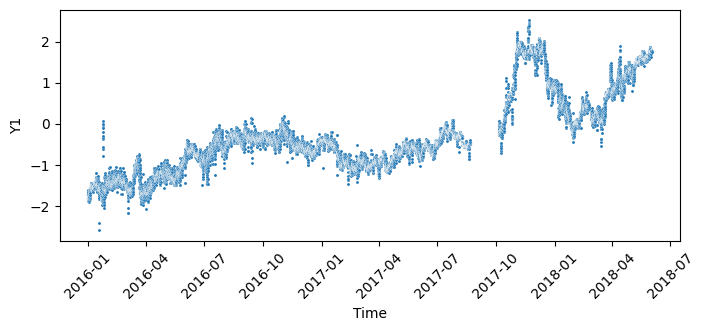

In [13]:
eda.plot_trend(train_set[['Time', 'Y1']], x='Time', y='Y1', xlabel='Time')

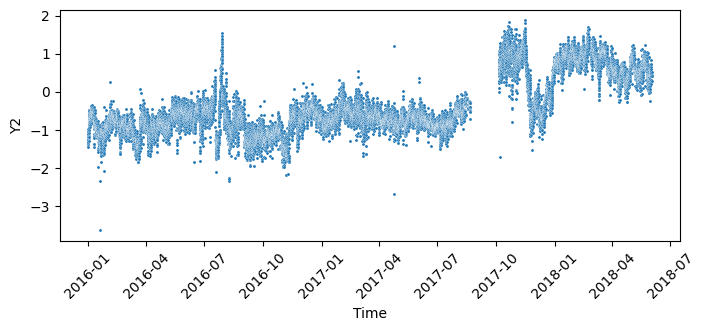

In [14]:
eda.plot_trend(train_set[['Time', 'Y2']], x='Time', y='Y2', xlabel='Time')

In [15]:
hour_diff = train_set['Time'].diff().fillna(pd.Timedelta(hours=0))
day_gap = hour_diff > pd.Timedelta(days=1)
gap_point_idx = np.where(day_gap)[0]
gap_1, gap_2 = gap_point_idx[0], gap_point_idx[1]

In [16]:
for i in range(2):
    day_diff = hour_diff[gap_point_idx[i]].days
    last_recorded = train_set['Time'][gap_point_idx[i] - 1]
    restart_recorded = train_set['Time'][gap_point_idx[i]]
    print(f"[{day_diff} days gap] {last_recorded} ==> {restart_recorded}")

[45 days gap] 2017-08-21 14:00:00 ==> 2017-10-05 15:00:00
[2 days gap] 2018-02-24 00:00:00 ==> 2018-02-26 20:00:00


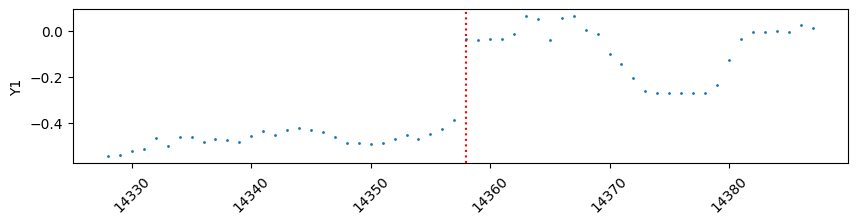

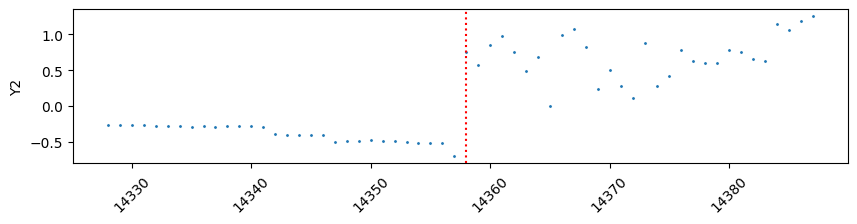

In [17]:
# First Gap: Index 14358
padding = 30
eda.plot_trend(train_y1[gap_1 - padding:gap_1 + padding], figsize=(10, 2))
plt.axvline(gap_1, color='red', linestyle=':')

eda.plot_trend(train_y2[gap_1 - padding:gap_1 + padding], figsize=(10, 2))
plt.axvline(gap_1, color='red', linestyle=':');

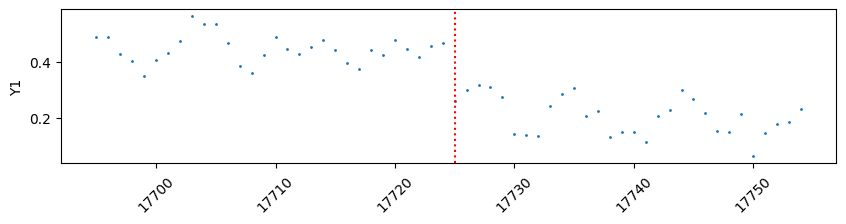

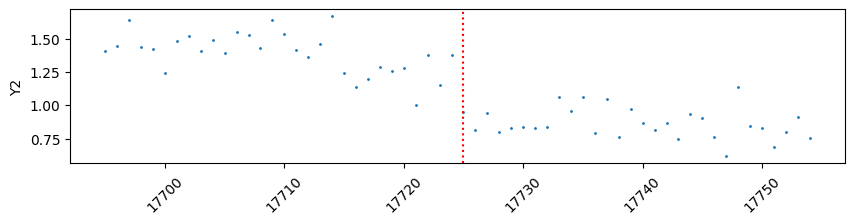

In [18]:
# Second Gap: Index 17725
eda.plot_trend(train_y1[gap_2 - padding:gap_2 + padding], figsize=(10, 2))
plt.axvline(gap_2, color='red', linestyle=':')

eda.plot_trend(train_y2[gap_2 - padding:gap_2 + padding], figsize=(10, 2))
plt.axvline(gap_2, color='red', linestyle=':');

In [19]:
train_set.iloc[gap_1 - 3:gap_1 + 3, :]

,Time,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X20,X21,X22,X23,X24,X25,X26,X27,Y1,Y2
14355,2017-08-21 12:00:00,-0.273058,-0.864888,-1.388181,0.499013,-1.040950,-1.097163,0.382327,-0.503433,-0.043960,...,0.158277,-0.968109,0.503360,0.830569,0.602921,0.248152,0.106151,-1.013140,-0.449869,-0.507567
14356,2017-08-21 13:00:00,-0.185826,-0.808805,-1.328716,0.548747,-1.021879,-1.081884,0.390640,-0.512700,0.090863,...,0.186828,-0.959163,0.501292,0.816298,0.597423,0.274744,0.113489,-1.180731,-0.429385,-0.521329
14357,2017-08-21 14:00:00,-0.017590,-0.765152,-1.624311,0.633384,-1.161400,-1.218280,0.437449,-0.455754,0.529247,...,0.215379,-0.950217,0.499225,0.802027,0.591924,0.301336,0.120828,-1.357750,-0.389306,-0.699528
14358,2017-10-05 15:00:00,-0.500547,-0.929003,-0.335119,0.203317,-0.082701,-0.164968,0.375214,-0.586970,0.717062,...,0.786392,-0.771296,0.457871,0.516604,0.481963,0.833171,0.267592,-1.737519,-0.034081,0.749622
14359,2017-10-05 16:00:00,-0.497840,-0.853369,-0.361539,0.179706,-0.138237,-0.238978,0.377826,-0.537509,0.808340,...,0.814942,-0.762350,0.455804,0.502332,0.476465,0.859763,0.274930,-1.751774,-0.037665,0.579634
14360,2017-10-05 17:00:00,-0.512754,-0.943104,-0.305590,0.207024,-0.123262,-0.226067,0.361292,-0.563546,0.798142,...,0.843493,-0.753403,0.453736,0.488061,0.470967,0.886355,0.282269,-1.752284,-0.035676,0.846172


**First Gap**: 2017년 8월 21일 14:00 이후 데이터가 끊겼다 2017년 10월 5일 15:00에 재개됨

In [20]:
train_set.iloc[gap_2 - 3:gap_2 + 3, :]

,Time,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X20,X21,X22,X23,X24,X25,X26,X27,Y1,Y2
17722,2018-02-23 21:00:00,0.067393,0.606461,1.628447,-0.456766,1.495879,1.492037,0.029580,1.773834,-0.214625,...,-1.136333,-0.360615,-1.062383,-1.025093,-1.069911,0.704303,-0.716119,1.228461,0.417554,1.376880
17723,2018-02-23 23:00:00,0.081980,0.576251,1.662229,-0.410975,1.460350,1.477884,0.074681,1.800676,0.128630,...,-1.125053,-0.336572,-1.047565,-1.013292,-1.055682,0.674984,-0.688812,1.197462,0.456429,1.152129
17724,2018-02-24 00:00:00,0.091564,0.636328,1.685648,-0.397237,1.456683,1.488001,0.105177,1.790127,0.061782,...,-1.119413,-0.324551,-1.040155,-1.007391,-1.048567,0.660325,-0.675159,1.236745,0.469081,1.373331
17725,2018-02-26 20:00:00,0.100376,0.705467,1.419831,-0.518539,1.408308,1.578881,0.696585,0.680992,1.472435,...,-0.407913,0.428783,0.108263,0.035044,0.089740,1.470266,0.414074,1.159378,0.263022,0.949672
17726,2018-02-26 21:00:00,0.076590,0.639574,1.417923,-0.516833,1.389600,1.552191,0.710936,0.692534,1.344475,...,-0.385118,0.456833,0.184577,0.090116,0.161432,1.534402,0.444415,1.149566,0.299053,0.811158
17727,2018-02-26 22:00:00,0.087629,0.628271,1.293467,-0.555895,1.331011,1.486858,0.754229,0.740310,1.074381,...,-0.362324,0.484883,0.260891,0.145188,0.233123,1.598538,0.474756,1.062780,0.318582,0.939978


**Second Gap**: 2018년 2월 24일 00:00 이후 데이터가 끊겼다 2018년 2월 26일 20:00에 재개됨

### X Trend

First Gap을 기준으로 모델링을 다르게 해야할듯

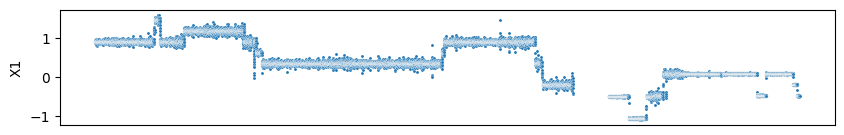

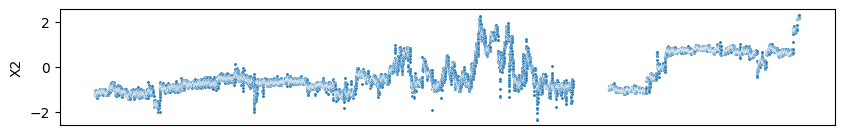

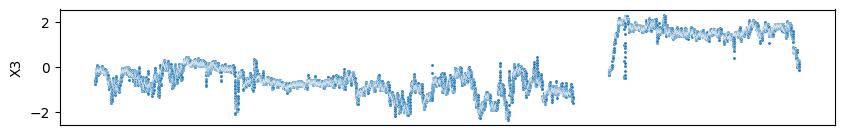

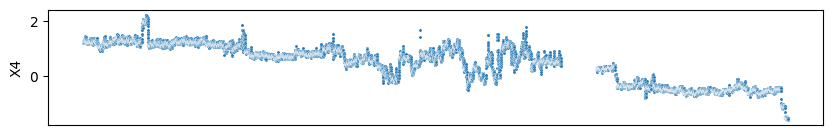

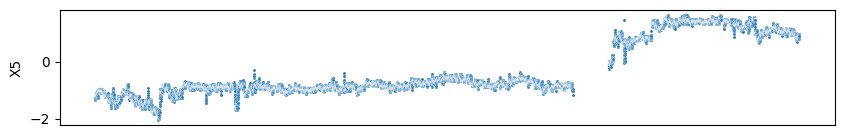

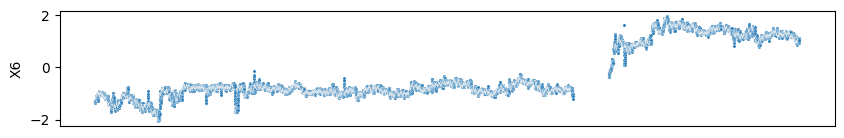

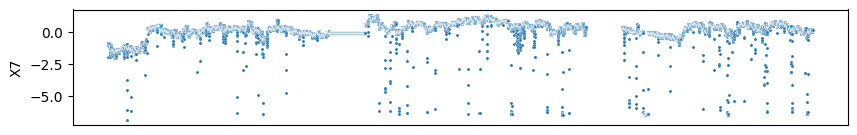

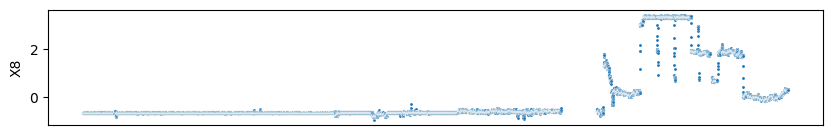

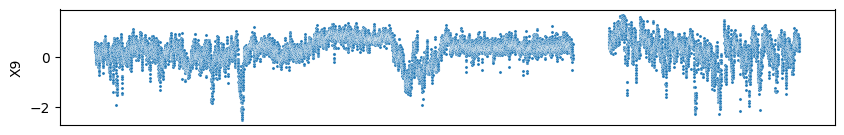

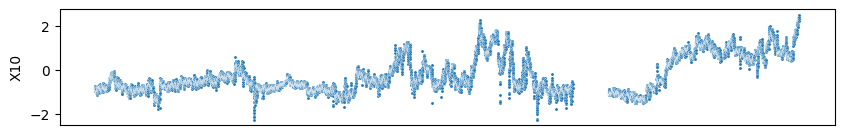

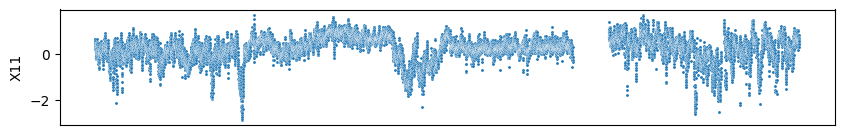

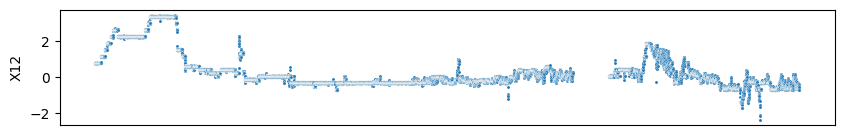

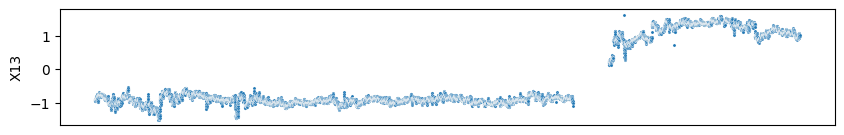

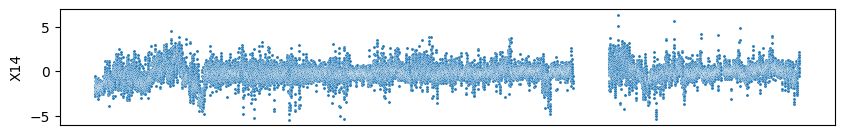

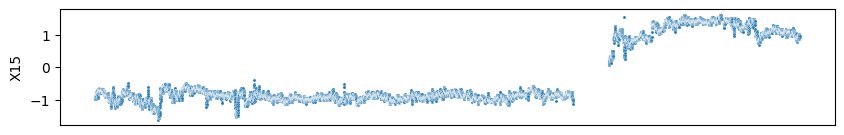

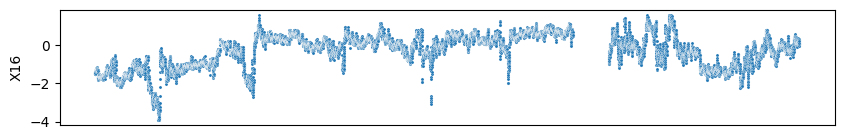

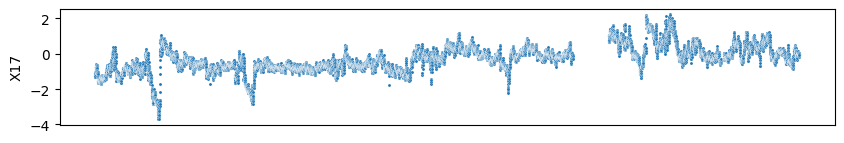

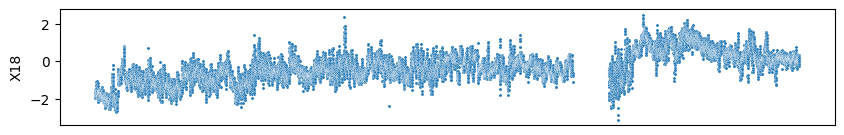

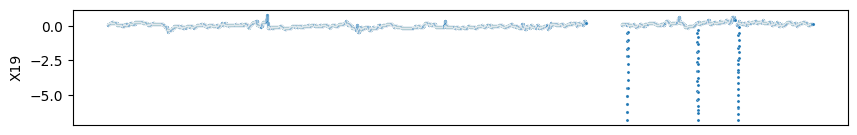

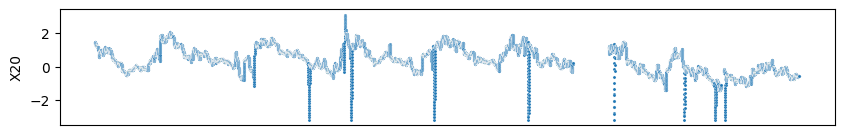

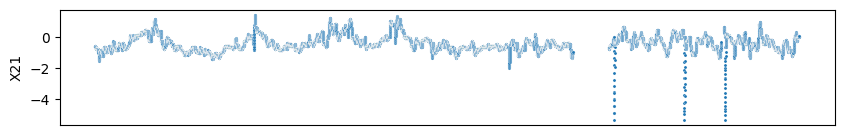

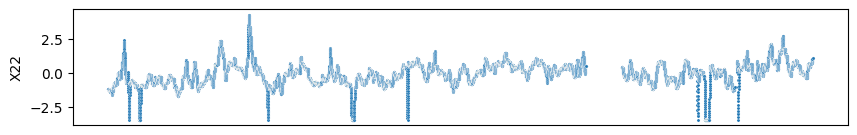

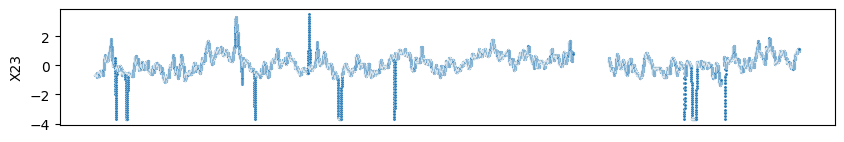

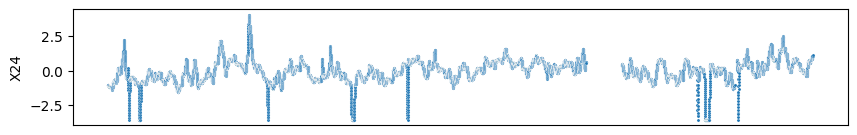

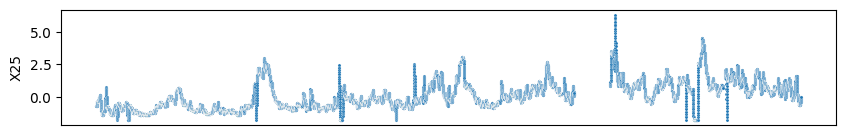

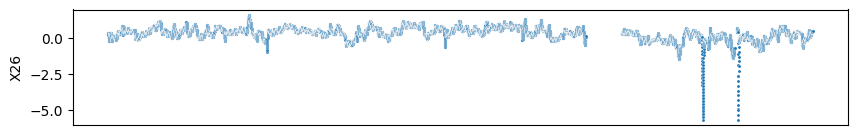

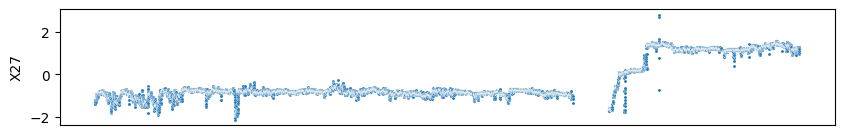

In [21]:
for col in train_X.data.columns[1:]:
    eda.plot_trend(train_X.data[['Time', col]], x='Time', y=col, figsize=(10, 1.5))
    plt.xticks([])
    plt.xlabel(None);

### X Range

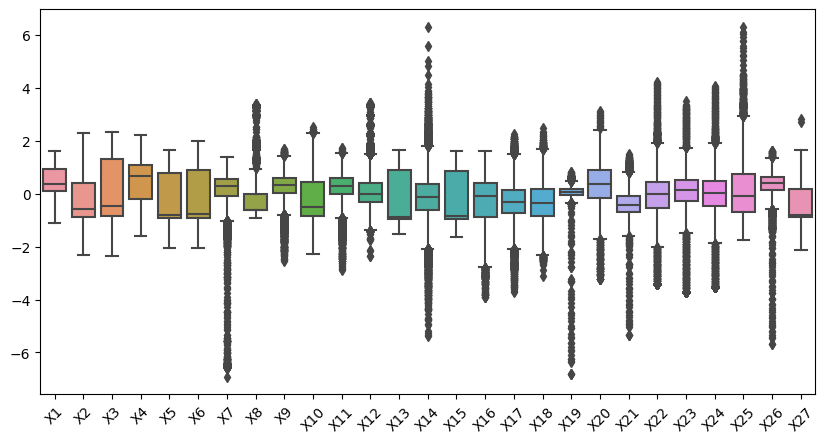

In [22]:
eda.plot_cont_boxplot(train_X.data.iloc[:, 1:], rotation=45, figsize=(10, 5))

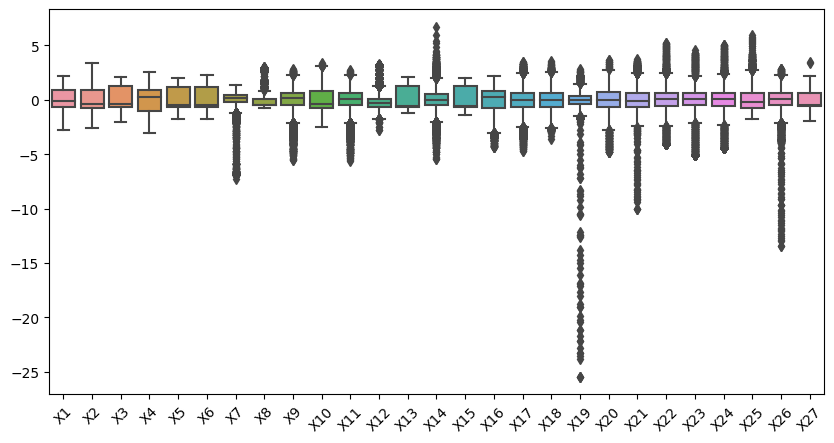

In [23]:
# Standardized
sc = StandardScaler()
train_X_sc = sc.fit_transform(train_X.data.iloc[:, 1:])
train_X_sc = pd.DataFrame(train_X_sc, columns=train_X.data.iloc[:, 1:].columns)
eda.plot_cont_boxplot(train_X_sc, rotation=45, figsize=(10, 5))

#### Consider Gap

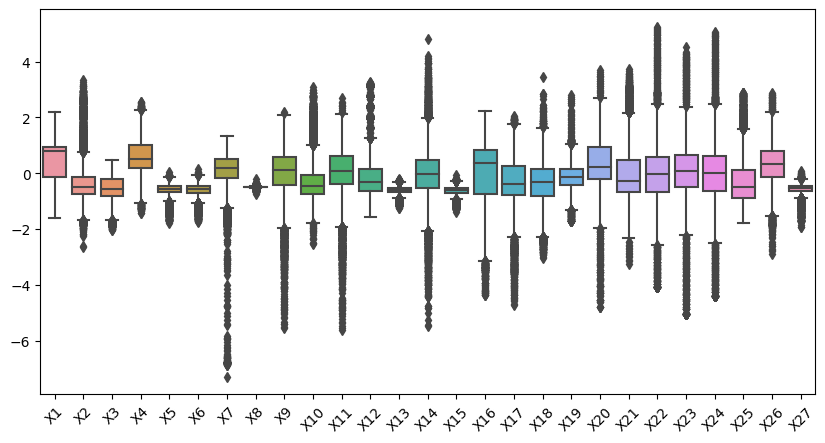

In [24]:
# Before Gap
eda.plot_cont_boxplot(train_X_sc.iloc[:gap_1], rotation=45, figsize=(10, 5))

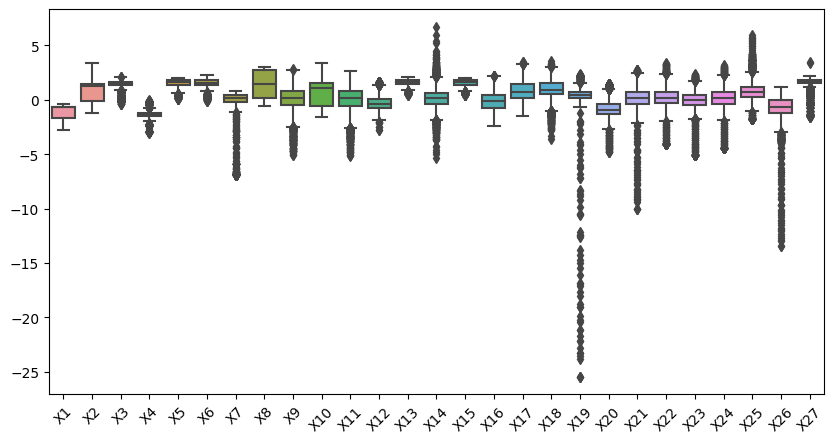

In [25]:
# After Gap
eda.plot_cont_boxplot(train_X_sc.iloc[gap_1:], rotation=45, figsize=(10, 5))

### X Correlation Heatmap

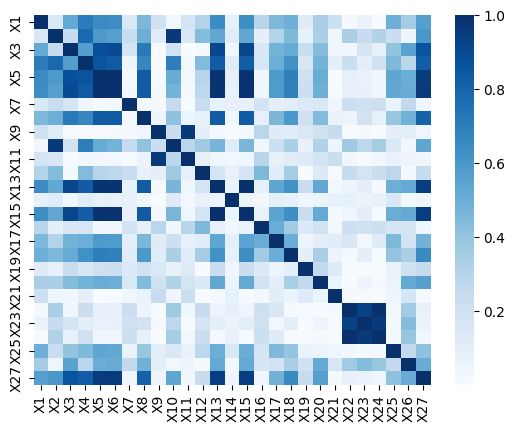

In [26]:
corr_mat = eda.corr_plot(train_X.data.iloc[:, 1:])

#### Consider Gap

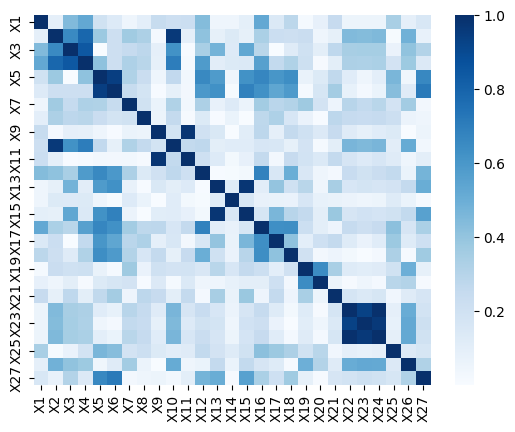

In [27]:
# Before Gap
corr_mat = eda.corr_plot(train_X.data.iloc[:gap_1, 1:])

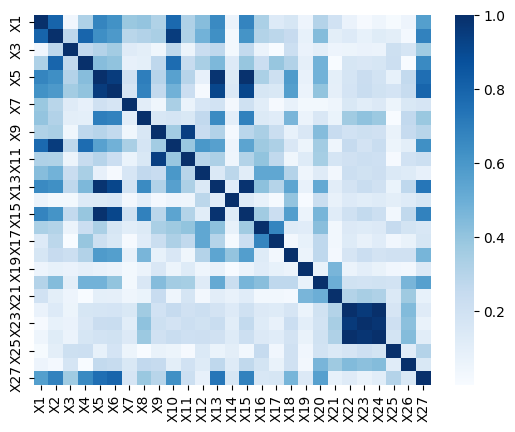

In [28]:
# After Gap
corr_mat = eda.corr_plot(train_X.data.iloc[gap_1:, 1:])

### Test X

In [29]:
test_X.drop_data(['Time'], axis=1)

Successfully dropped!


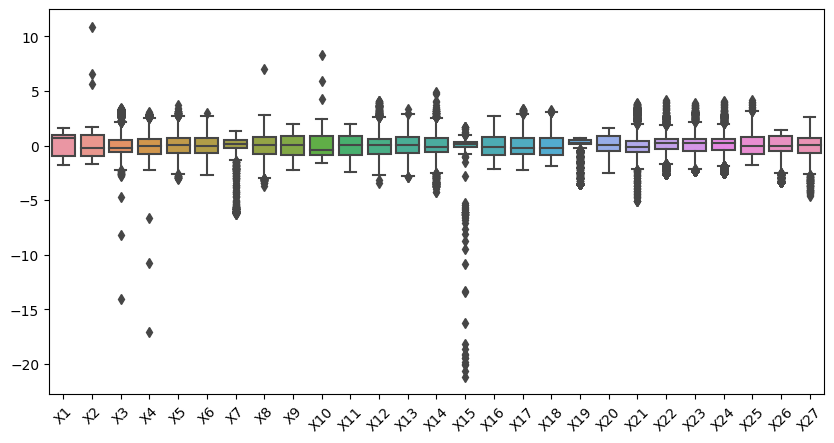

In [30]:
# Standardized
sc = StandardScaler()
test_X_sc = sc.fit_transform(test_X.data)
test_X_sc = pd.DataFrame(test_X_sc, columns=test_X.data.columns)
eda.plot_cont_boxplot(test_X_sc, rotation=45, figsize=(10, 5))

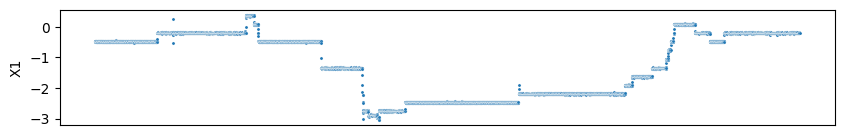

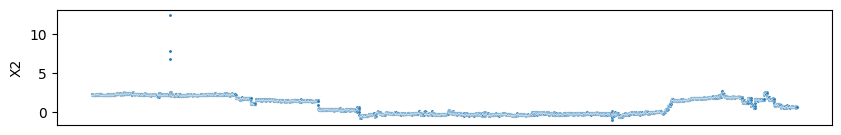

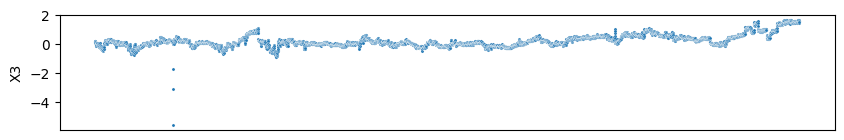

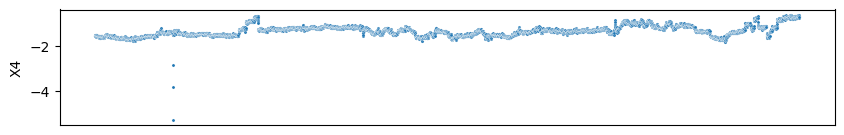

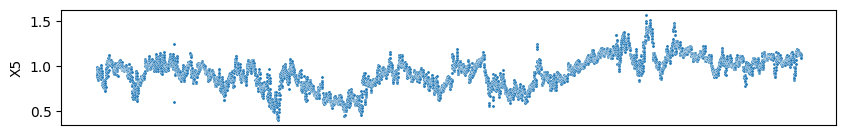

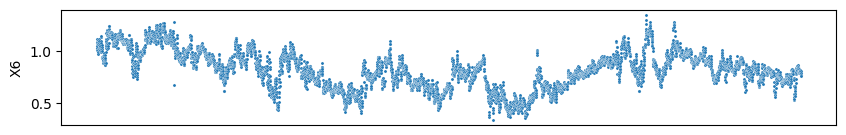

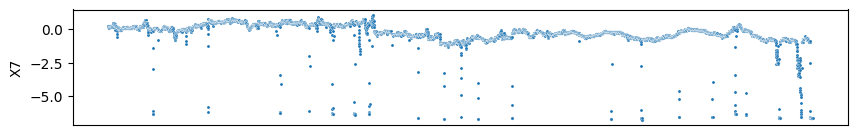

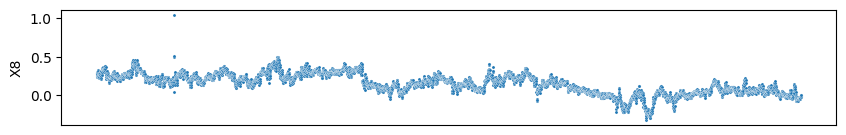

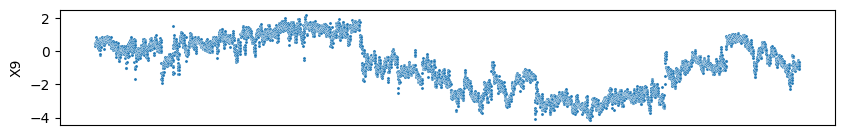

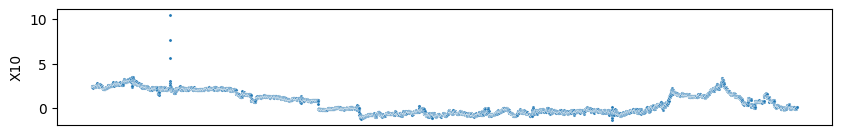

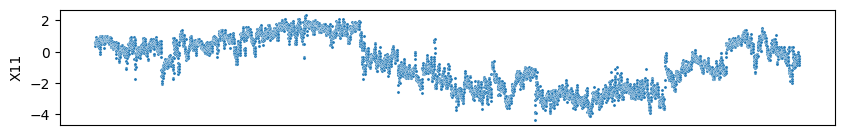

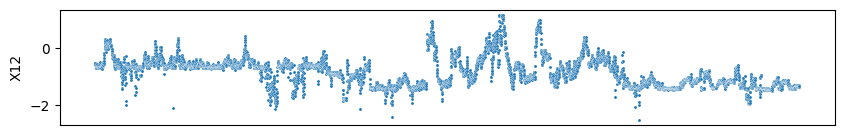

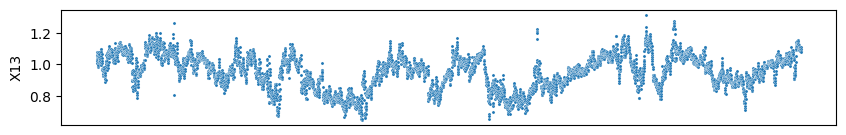

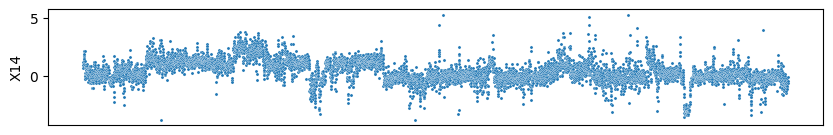

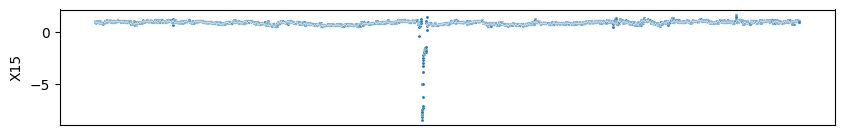

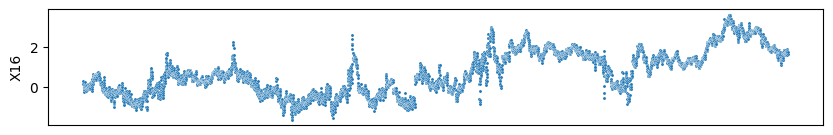

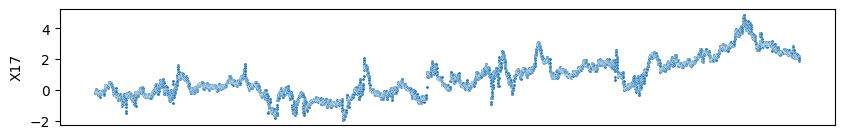

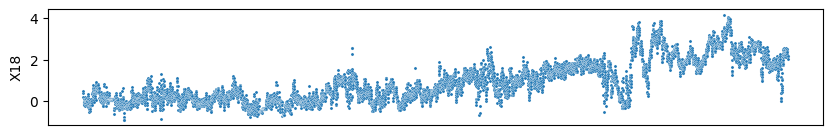

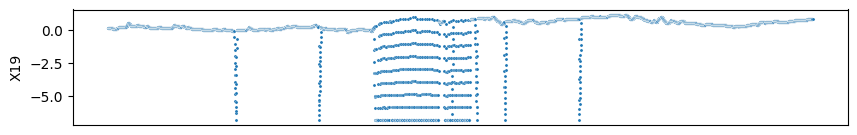

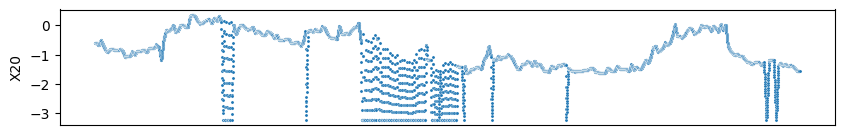

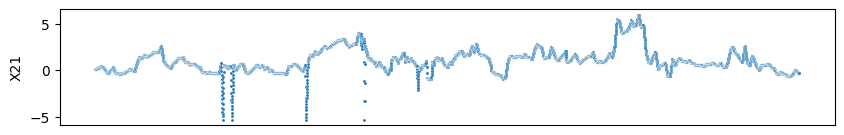

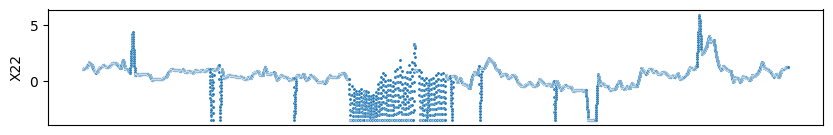

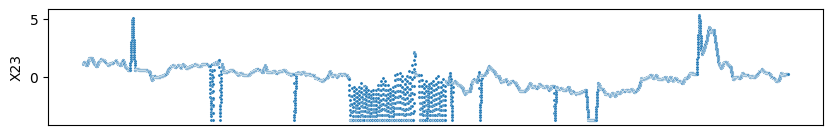

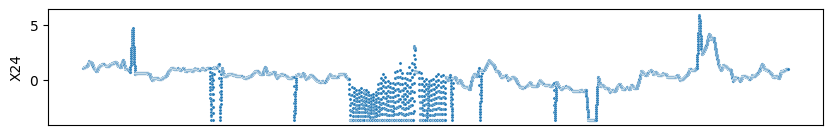

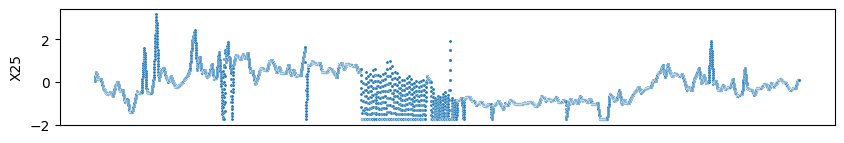

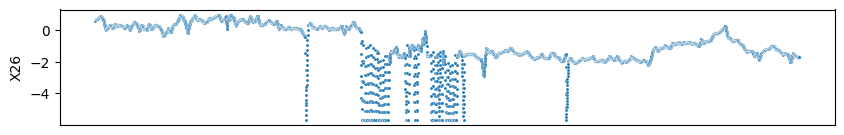

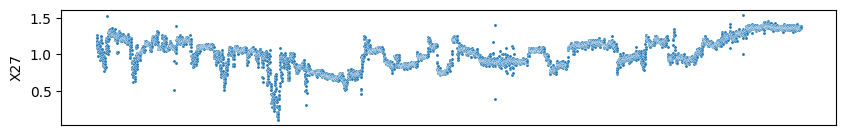

In [31]:
for col in test_X.data.columns:
    eda.plot_trend(test_X.data[col], figsize=(10, 1.5))
    plt.xticks([])
    plt.xlabel(None);

## Preprocessing

In [32]:
train_X.drop_data(['Time'], axis=1)

Successfully dropped!


In [33]:
train_X_1 = train_X.data.iloc[:gap_1]
train_X_2 = train_X.data.iloc[gap_1:]
train_y1_1 = train_y1.iloc[:gap_1]
train_y2_1 = train_y2.iloc[:gap_1]
train_y1_2 = train_y1.iloc[gap_1:]
train_y2_2 = train_y2.iloc[gap_1:]

#### CSV to Pickle

In [34]:
train_X_1.to_pickle('dataset/train_X_1.pkl')
train_X_2.to_pickle('dataset/train_X_2.pkl')
test_X.data.to_pickle('dataset/01_test.pkl')

In [35]:
train_y1_1.to_pickle('dataset/train_y1_1.pkl')
train_y2_1.to_pickle('dataset/train_y2_1.pkl')
train_y1_2.to_pickle('dataset/train_y1_2.pkl')
train_y2_2.to_pickle('dataset/train_y2_2.pkl')